In [1]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle
import textwrap

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import rtclass as rtc; reload(rtclass);
import coronadataclass as cdc; reload(cdc);

np.seterr(divide = 'ignore');


In [5]:
rt = rtc.RtComputation(HighestDensityIntervals = [.95], resolve_US_states = True)

In [6]:
rtDF = None
for country, rtdata in rt:
    
    rtdata['Country'] = country
    if rtDF is None:
        rtDF = rtdata
    else:
        rtDF = pd.concat([rtDF,rtdata])

            
rtDF.to_csv('Rt_bayesian_estimates.csv')

In [7]:
rtDF

,Rt,Low_95,High_95,Country
Date,,,,
2020-04-02,0.95,0.10,3.39,Afghanistan
2020-04-03,0.52,0.07,2.44,Afghanistan
2020-04-04,0.85,0.10,2.40,Afghanistan
2020-04-05,0.89,0.10,2.25,Afghanistan
2020-04-06,1.09,0.15,2.32,Afghanistan
...,...,...,...,...
2020-05-13,1.51,0.60,2.38,Uzbekistan
2020-05-10,2.18,0.35,4.10,Zambia
2020-05-11,2.16,0.70,3.50,Zambia


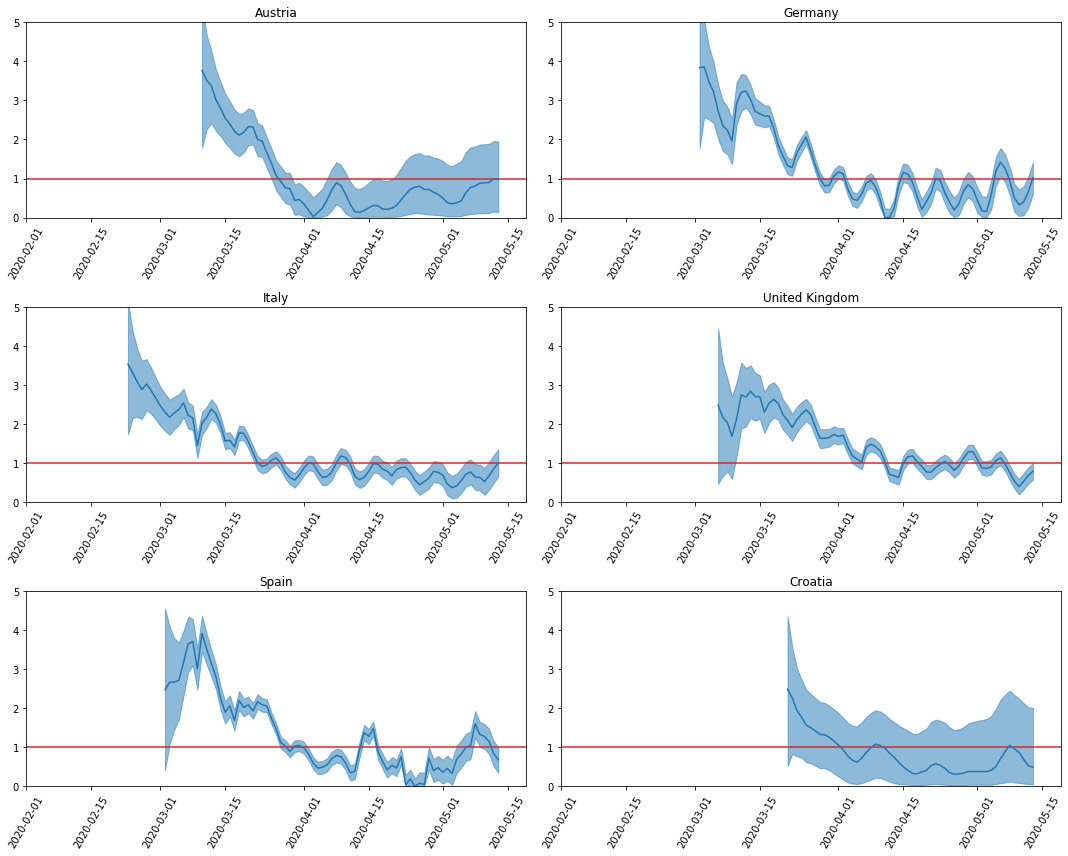

In [25]:
specialcountries = ['Austria','Germany','Italy','United Kingdom','Spain','Croatia']
figlen = len(specialcountries)//2 + len(specialcountries)%2

fig,axes = plt.subplots(figlen,2,figsize = (15,figlen*4))
ax = axes.flatten()
for i,country in enumerate(specialcountries):
    dates = rtDF[rtDF['Country'] == country].index
    rtvalues = rtDF[rtDF['Country'] == country]['Rt'].values
    lowvalues = rtDF[rtDF['Country'] == country]['Low_95'].values
    highvalues = rtDF[rtDF['Country'] == country]['High_95'].values
    ax[i].plot(dates,rtvalues, c = 'TAB:BLUE')
    ax[i].fill_between(dates,lowvalues,highvalues,alpha = .5, color = 'TAB:BLUE')
    ax[i].set_title(country)
    ax[i].set_xlim([datetime.datetime.strptime('01/02/2020','%d/%m/%Y'),datetime.datetime.now()])
    ax[i].set_ylim([0,5])
    ax[i].tick_params(axis = 'x', rotation=60)
    ax[i].hlines(1,ax[i].get_xlim()[0],ax[i].get_xlim()[1],color = 'TAB:RED')
fig.tight_layout()
fig.savefig('Rt_examples.pdf')